<a href="https://colab.research.google.com/github/PaulaDiz/LABORATORIOS/blob/main/LAB04_GRUPO_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio 1: Regresión lineal Simple**

Una prestigiosa empresa productora de vinos quiere construir un modelo de regresión que le permita predecir  el porcentaje de alcohol de un vino en base a ciertas características (acidez, azúcar residual, azufre, cloruros,  densidad, tipo de vino, sulfatos y pH).  

Para ello han construido un dataset, denominado wine_alcohol.csv, que contiene la información de todos los  vinos que han sido producidos en los últimos años con el objetivo de construir un modelo y realizar las  siguientes acciones:

1) Realizar todo el proceso de preparación, limpieza y análisis de los datos con el objetivo de identificar  aquellas variables candidatas para el proceso de regresión

2) Realizar un análisis sobre los atributos del dataset con el objetivo de entender las posibles relaciones  que existen entre ellas y a continuación elige los dos atributos que mayor relación guardan con el  atributo objetivo (nivel de alcohol).En necesario justificar la elección de los atributos
mediante la utilización de datos empíricos.

3) Construir un modelo de regresión lineal mediante un proceso analítico para una de las variables  seleccionadas en el punto anterior.

4) Calcular el error en el modelo obtenidos en el punto anterior

# **Pregunta 1**

1) Realizar todo el proceso de preparación, limpieza y análisis de los datos con el objetivo de identificar  aquellas variables candidatas para el proceso de regresión

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Cargar los datos nuevamente, esta vez especificando el delimitador correcto
data = pd.read_csv('wine_alcohol.csv', delimiter=';')

# Mostrar las primeras filas del dataframe y el resumen de información nuevamente
data

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,5,1,9.4
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,5,1,9.8
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,5,1,9.8
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,6,1,9.8
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,5,1,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,6,2,11.2
6493,4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,5,2,9.6
6494,4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,6,2,9.4
6495,4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,7,2,12.8


In [3]:
# Seleccionar columnas específicas
data = data[['alcohol','fixed acidity', 'residual sugar', 'total sulfur dioxide', 'chlorides', 'density', 'wine type', 'sulphates', 'pH']]
data

,alcohol,fixed acidity,residual sugar,total sulfur dioxide,chlorides,density,wine type,sulphates,pH
0,9.4,7.4,1.9,34.0,0.076,0.99780,1,0.56,3.51
1,9.8,7.8,2.6,67.0,0.098,0.99680,1,0.68,3.20
2,9.8,7.8,2.3,54.0,0.092,0.99700,1,0.65,3.26
3,9.8,11.2,1.9,60.0,0.075,0.99800,1,0.58,3.16
4,9.4,7.4,1.9,34.0,0.076,0.99780,1,0.56,3.51
...,...,...,...,...,...,...,...,...,...
6492,11.2,6.2,1.6,92.0,0.039,0.99114,2,0.50,3.27
6493,9.6,6.6,8.0,168.0,0.047,0.99490,2,0.46,3.15
6494,9.4,6.5,1.2,111.0,0.041,0.99254,2,0.46,2.99
6495,12.8,5.5,1.1,110.0,0.022,0.98869,2,0.38,3.34


In [4]:
nan_count = data.isna().sum()
print("Cantidad de valores NaN por columna:")
print(nan_count)

Cantidad de valores NaN por columna:
alcohol                 0
fixed acidity           0
residual sugar          0
total sulfur dioxide    0
chlorides               0
density                 0
wine type               0
sulphates               0
pH                      0
dtype: int64


In [5]:
cantidad_duplicados = data.duplicated().sum()
cantidad_duplicados
print("Cantidad de filas antes de eliminar duplicados:", len(data))
print("Cantidad de duplicados:", cantidad_duplicados)

Cantidad de filas antes de eliminar duplicados: 6497
Cantidad de duplicados: 1177


In [6]:
# Eliminar datos duplicados
data = data.drop_duplicates()
print("Cantidad de filas después de eliminar duplicados:", len(data))
cantidad_duplicados = data.duplicated().sum()
print("Cantidad de duplicados después:", cantidad_duplicados)

Cantidad de filas después de eliminar duplicados: 5320
Cantidad de duplicados después: 0


In [7]:
data.head()

,alcohol,fixed acidity,residual sugar,total sulfur dioxide,chlorides,density,wine type,sulphates,pH
0,9.4,7.4,1.9,34.0,0.076,0.9978,1,0.56,3.51
1,9.8,7.8,2.6,67.0,0.098,0.9968,1,0.68,3.20
2,9.8,7.8,2.3,54.0,0.092,0.9970,1,0.65,3.26
3,9.8,11.2,1.9,60.0,0.075,0.9980,1,0.58,3.16
5,9.4,7.4,1.8,40.0,0.075,0.9978,1,0.56,3.51


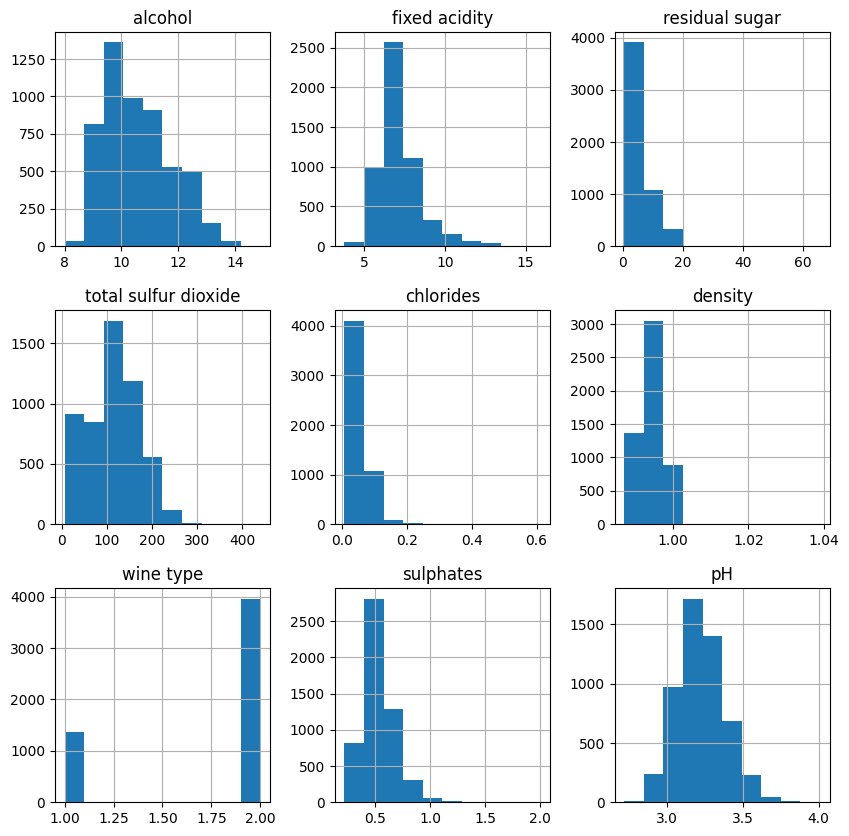

In [8]:
# Paso 4: Análisis exploratorio de datos (EDA)
# Visualización de la distribución de las variables
data.hist(figsize=(10,10))
plt.show()

Podemos sacar distintas consluciones de los datos.

- Existen dos tipos de vino

- El gran volumen de datos de pH se encuentra entre valores de 3 y 3.5

- El de sulfatos entre 0-1

- chlorides entre 0-0.2

- Los datos de sulfuro se encuentren entre 0-300

- Los datos de azucar se encuentran entre 0-20

- La mayoría de datos de la acidez se encuentran entre 5-10

Veamos un resumen de nuestros datos: máximos, mínimos, medias, varianza ...

Y la representaremos en una tanbla.

In [9]:
data.describe()

,alcohol,fixed acidity,residual sugar,total sulfur dioxide,chlorides,density,wine type,sulphates,pH
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,10.549241,7.215179,5.048477,114.109023,0.056690,0.994535,1.744549,0.533357,3.224664
std,1.185933,1.319671,4.500180,56.774223,0.036863,0.002966,0.436155,0.149743,0.160379
min,8.000000,3.800000,0.600000,6.000000,0.009000,0.987110,1.000000,0.220000,2.720000
25%,9.500000,6.400000,1.800000,74.000000,0.038000,0.992200,1.000000,0.430000,3.110000
50%,10.400000,7.000000,2.700000,116.000000,0.047000,0.994650,2.000000,0.510000,3.210000
75%,11.400000,7.700000,7.500000,153.250000,0.066000,0.996770,2.000000,0.600000,3.330000
max,14.900000,15.900000,65.800000,440.000000,0.611000,1.038980,2.000000,2.000000,4.010000


# **Pregunta 2**

2) Realizar un análisis sobre los atributos del dataset con el objetivo de entender las posibles relaciones  que existen entre ellas y a continuación elige los dos atributos que mayor relación guardan con el  atributo objetivo (nivel de alcohol).En necesario justificar la elección de los atributos
mediante la utilización de datos empíricos.


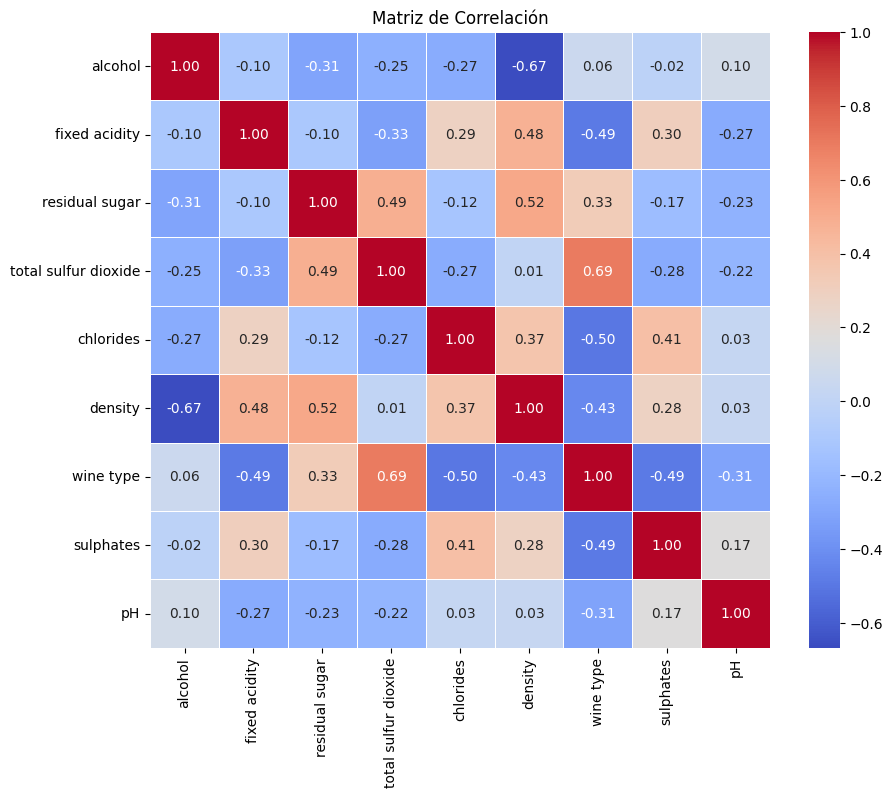

In [10]:
# Matriz de correlación
correlation_matrix = data.corr()

# Crear mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

In [11]:
# Selección de los dos atributos con mayor correlación con el nivel de alcohol
correlation_with_alcohol = correlation_matrix['alcohol'].drop('alcohol')  # Excluimos el nivel de alcohol
atributo1 = correlation_with_alcohol.abs().nlargest(1).index[0]
atributo2 = correlation_with_alcohol.abs().nlargest(2).index[1]
print("Los dos atributos con mayor correlación con el nivel de alcohol son:", atributo1, "y", atributo2)

Los dos atributos con mayor correlación con el nivel de alcohol son: density y residual sugar


**Consideramos tanto las correlaciones positivas como negativas**.

¿ Qué quiere decir esto?

Las correlaciones positivas con el nivel de alcohol, significa que aumentan juntas, mientras las correlaciones negativas,  significa que una variable aumenta mientras que el nivel de alcohol disminuye.

Es importante considerar tanto las correlaciones positivas como las negativas porque ambas pueden proporcionar información valiosa sobre las relaciones entre las variables y el atributo objetivo.

# **Pregunta 3 y 4**

3) Construir un modelo de regresión lineal mediante un proceso analítico para una de las variables  seleccionadas en el punto anterior.

4) Calcular el error en el modelo obtenidos en el punto anterior

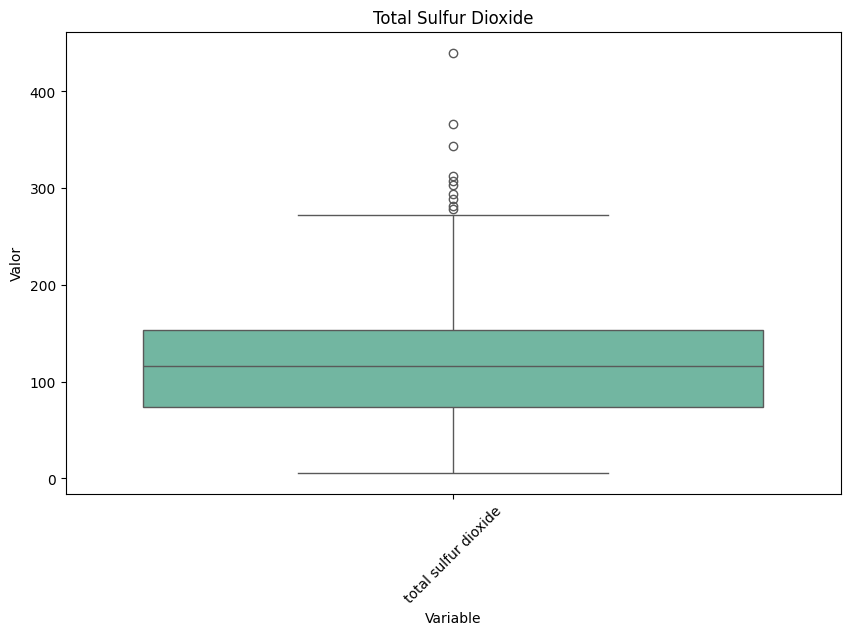

In [12]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['total sulfur dioxide']], palette='Set2')
plt.title('Total Sulfur Dioxide')
plt.xlabel('Variable')
plt.ylabel('Valor')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor legibilidad
plt.show()

Como hay pocos valores atípicos eliminaremos dichos valores

In [13]:
# Calcular el Z-score para la variable "total sulfur dioxide"
data['total_sulfur_dioxide_zscore'] = zscore(data['total sulfur dioxide'])
# Identificar los valores atípicos basados en un umbral de Z-score
outliers = data[data['total_sulfur_dioxide_zscore'].abs() > 3]
# Eliminar los valores atípicos del conjunto de datos
data_cleaned = data[data['total_sulfur_dioxide_zscore'].abs() <= 3]
# Eliminar la columna de Z-score temporal
data_cleaned.drop(columns=['total_sulfur_dioxide_zscore'], inplace=True)

<ipython-input-13-2530d8476268>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_sulfur_dioxide_zscore'] = zscore(data['total sulfur dioxide'])
<ipython-input-13-2530d8476268>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop(columns=['total_sulfur_dioxide_zscore'], inplace=True)


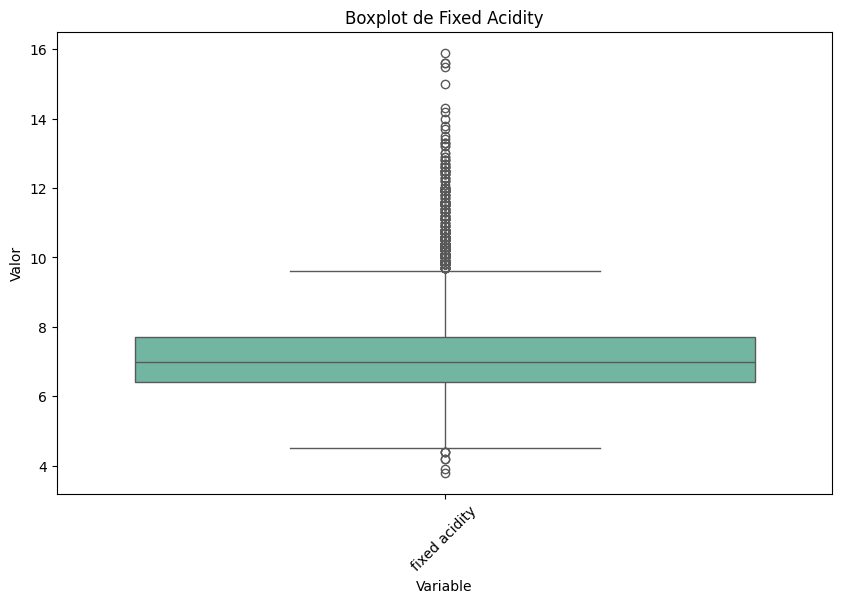

In [14]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['fixed acidity']], palette='Set2')
plt.title('Boxplot de Fixed Acidity')
plt.xlabel('Variable')
plt.ylabel('Valor')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor legibilidad
plt.show()

Como existen muchos valores atípicos en esta variable, no eliminaremos estos datos pero transformamos los datos (transformación logarítmica) que  ayudará a reducir el impacto de los valores atípicos y puede mejorar la distribución de los datos si la variable

In [15]:
# Aplicar la transformación logarítmica a la variable "fixed acidity"
data['fixed_acidity'] = np.log(data['fixed acidity'])

<ipython-input-15-4e59b14650f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fixed_acidity'] = np.log(data['fixed acidity'])


In [16]:
# Definir las variables predictoras (X) y la variable objetivo (y)
X = data[['total sulfur dioxide']]  # Variables seleccionadas
y = data['alcohol']   # Variable objetivo

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización de datos
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir sobre el conjunto de entrenamiento y el conjunto de prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)

print("RMSE en conjunto de entrenamiento:", train_rmse)
print("RMSE en conjunto de prueba:", test_rmse)
print("R^2 Score:", r2)

# Coeficientes del modelo
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

RMSE en conjunto de entrenamiento: 1.1526388268290713
RMSE en conjunto de prueba: 1.131763715393885
R^2 Score: 0.060859036454997684
Coeficientes: [-0.00521882]
Intercepto: 11.151980241247767


In [17]:
# Definir las variables predictoras (X) y la variable objetivo (y)
X = data[['fixed acidity']]  # Variables seleccionadas
y = data['alcohol']   # Variable objetivo

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización de datos
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir sobre el conjunto de entrenamiento y el conjunto de prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)

print("RMSE en conjunto de entrenamiento:", train_rmse)
print("RMSE en conjunto de prueba:", test_rmse)
print("R^2 Score:", r2)

# Coeficientes del modelo
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

RMSE en conjunto de entrenamiento: 1.1836054450225266
RMSE en conjunto de prueba: 1.1633157539093066
R^2 Score: 0.007765163905660177
Coeficientes: [-0.09502627]
Intercepto: 11.237384342406498


El segundo modelo es mejor que el primero ya que presenta un RMSE más bajo y un R^2 más alto.

- Un RMSE más bajo indica un mejor ajuste del modelo a los datos.

-  El R^2 es una medida de la proporción de la variabilidad en la variable dependiente que es explicada por el modelo. Un R^2 más alto indica que el modelo es capaz de explicar una mayor parte de la variabilidad en la variable objetivo

# Ejercicio 2:  (Regresión lineal múltiple)

La empresa productora de vinos cree que es posible construir un modelo de mejor calidad que pueda predecir
mejor el grado de alcohol de los futuros vinos si se utilizan varios atributos del dataset. Para ello se solicita la
creación de nuevos modelos realizando las siguientes acciones:

1) Crear los diferentes conjuntos de entrenamiento y test para el dataset (0.25 puntos).

2) Construir un modelo de regresión que utilice al menos 4 de los atributos (es posible utilizar más
atributos) disponibles en el dataset mediante la utilización de un proceso aprendizaje iterativo. (1.5
puntos).

3) Calcular el error del modelo (0.5 puntos).

4) Evaluar el modelo anterior con el conjunto de test construido anteriormente y explicar el resultado
obtenido. (0.25 puntos).

5) Calcular los intervalos de confianza para cada uno de los coeficientes de regresión con un intervalo de
confianza del 75% y explica el resultado obtenido (0.5 puntos).


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [19]:
# Cargar los datos nuevamente
datos = pd.read_csv('wine_alcohol.csv', delimiter=';')

datos

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,5,1,9.4
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,5,1,9.8
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,5,1,9.8
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,6,1,9.8
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,5,1,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,6,2,11.2
6493,4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,5,2,9.6
6494,4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,6,2,9.4
6495,4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,7,2,12.8


Vamos a realizar la mayriz de correlación, para ver qué atributos están más relacionados con el alcohol.

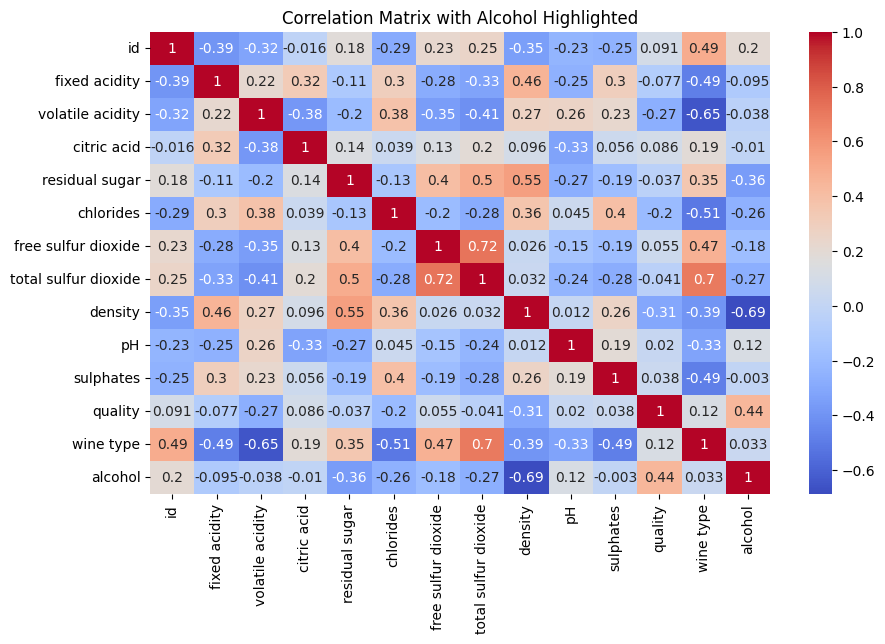

alcohol                 1.000000
quality                 0.444319
id                      0.197157
pH                      0.121248
wine type               0.032970
sulphates              -0.003029
citric acid            -0.010493
volatile acidity       -0.037640
fixed acidity          -0.095452
free sulfur dioxide    -0.179838
chlorides              -0.256916
total sulfur dioxide   -0.265740
residual sugar         -0.359415
density                -0.686745
Name: alcohol, dtype: float64

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = datos.corr()

# Visualizar la matriz de correlación con respecto a 'alcohol'
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Alcohol Highlighted')
plt.show()

# Mostrar la correlación específica con 'alcohol'
correlation_matrix['alcohol'].sort_values(ascending=False)


# **Pregunta 1, 2, 3 y 4**

Para el primer modelo cogeremos los 4 atributos más relacionados, teniendo en cuenta tanto correlaciones negativas como positivas y estableceremos 2 distribuciones de conjunto de prueba y test. Comprobaremos como se comporta el modelo con un 20% de datos de test frente a un modelo con el 30%

In [21]:
# Definir las variables independientes y la variable dependiente
X = datos[['density','quality', 'residual sugar', 'total sulfur dioxide']]
y = datos['alcohol']

In [22]:
# Dividir los datos en conjunto de entrenamiento y de prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# Crear el modelo de regresión lineal múltiple
model1 = LinearRegression()
model1.fit(X_train1, y_train1)


LinearRegression()

In [25]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)

LinearRegression()

In [26]:
# Realizar predicciones sobre el conjunto de prueba
y_test_pred1 = model1.predict(X_test1)
y_train_pred1 = model1.predict(X_train1)

# Vemos cómo ajusta el modelo con la bondad de ajuste.
r2_test1 = r2_score(y_test1, y_test_pred1)

# Error del modelo
mse1 = mean_squared_error(y_test1, y_test_pred1)
# Mostrar la bondad de ajuste del modelo
print(f'Error del moelo: {mse1:.2f}')
print(f'Bondad de ajuste: {r2_test1:.2f}')

Error del moelo: 0.58
Bondad de ajuste: 0.60


In [27]:
# Realizar predicciones sobre el conjunto de prueba
y_test_pred2 = model2.predict(X_test2)
y_train_pred2 = model2.predict(X_train2)

# Vemos cómo ajusta el modelo con la bondad de ajuste.
r2_test2 = r2_score(y_test2, y_test_pred2)

# Error del modelo
mse2 = mean_squared_error(y_test2, y_test_pred2)
# Mostrar la bondad de ajuste del modelo
print(f'Error del moelo: {mse2:.2f}')
print(f'Bondad de ajuste: {r2_test2:.2f}')

Error del moelo: 0.55
Bondad de ajuste: 0.61


Con un 70% de datos en vez de 80% de entrenamiento el modelo aumenta su ajuste 0.01 . Lo que indica en este caso que coger menor cantidad de datos de entrenamiento nos ayudará a tener mayor precisión.

Pero vamos a realizar una última prueba a ver si reduciendo aun más el conjunto obtenemos mayor precision

In [28]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.4, random_state=42)
model3 = LinearRegression()
model3.fit(X_train3, y_train3)
# Realizar predicciones sobre el conjunto de prueba
y_test_pred3 = model3.predict(X_test3)
y_train_pred3 = model3.predict(X_train3)

# Vemos cómo ajusta el modelo con la bondad de ajuste.
r2_test3 = r2_score(y_test3, y_test_pred3)

# Error del modelo
mse3 = mean_squared_error(y_test3, y_test_pred3)
# Mostrar la bondad de ajuste del modelo
print(f'Error del moelo: {mse3:.2f}')
print(f'Bondad de ajuste: {r2_test3:.2f}')

Error del moelo: 0.54
Bondad de ajuste: 0.62


Con la siguiente reducción el modelo vuelve a subir, esto se puede deber a que con más datos el modelo puede llegara sobreentrenar y no son necesarios, por tanto el mejor modelo lo obtenemos con un conjunto de 60% de datos de prueba y 40% de datos de test.

# **Pregunta 5**

A continuación calculamos los intervalos de confianza del mejor modelo.

In [29]:
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
# Calcular los errores estándar de los coeficientes utilizando las predicciones del conjunto de entrenamiento
residuals = y_train3 - y_train_pred3
rss = np.sum(residuals**2)
degrees_of_freedom = len(y_train2) - X_train3.shape[1] - 1
var_c = np.linalg.inv(np.dot(X_train3.T, X_train3))
se = np.sqrt(np.diagonal(var_c * (rss / degrees_of_freedom)))

# Nivel de confianza del 75%
confidence_level = 0.75
t_critical = stats.t.ppf((1 + confidence_level) / 2, df=degrees_of_freedom)

# Calcular intervalos de confianza
ci_lower = model3.coef_ - t_critical * se
ci_upper = model3.coef_ + t_critical * se

# Mostrar los resultados
for idx, col_name in enumerate(X.columns):
    print(f"{col_name}: Coeficiente: {model3.coef_[idx]:.2f}, Intervalo de confianza: [{ci_lower[idx]:.2f}, {ci_upper[idx]:.2f}]")

density: Coeficiente: -289.32, Intervalo de confianza: [-289.41, -289.23]
quality: Coeficiente: 0.30, Intervalo de confianza: [0.28, 0.31]
residual sugar: Coeficiente: 0.06, Intervalo de confianza: [0.06, 0.06]
total sulfur dioxide: Coeficiente: -0.01, Intervalo de confianza: [-0.01, -0.01]


Los resultados obtenidos para los coeficientes de regresión y sus intervalos de confianza indican cómo cada variable influye en la variable objetivo, que en este caso es el nivel de alcohol.

Coeficientes:

Density (-289.32):
El coeficiente de -289.32 indica que por cada unidad que aumenta la densidad, el grado de alcohol en el vino disminuye en 292.97 unidades, asumiendo que todas las demás variables permanecen constantes. El intervalo de confianza de [-289.41, -289.23] es muy estrecho, lo que sugiere que estamos muy seguros de la magnitud del impacto de la densidad sobre el alcohol.

Quality (0.30):
El coeficiente de 0.30 sugiere que por cada aumento de una unidad en la calidad del vino, se espera que el grado de alcohol aumente en 0.30 unidades, manteniendo constantes las demás variables. Con un intervalo de [0.28, 0.31], este coeficiente también está precisamente estimado y sugiere un efecto positivo moderado de la calidad en el grado de alcohol.

Residual Sugar (0.06):
Este coeficiente indica que un aumento de una unidad en el azúcar residual está asociado con un aumento de 0.06 unidades en el grado de alcohol. El intervalo de [0.06, 0.06] muestra una estimación muy precisa, lo que indica que estamos seguros de la influencia positiva del azúcar residual sobre el grado de alcohol.

Total Sulfur Dioxide (-0.01):
Cada aumento de una unidad en el dióxido de azufre total reduce el grado de alcohol en 0.01 unidades. Al igual que con el azúcar residual, el intervalo de confianza de [-0.01, -0.01] es muy estrecho, lo que indica una alta precisión en esta estimación, aunque el efecto es pequeño.

# **Ejercicio 3: Regresión y agrupamiento**

La empresa productora de vinos no está segura de que la empresa de analiza la calidad de los diferentes vinos
esté realizando el trabajo adecuadamente por lo que ha decidido analizar si los diferentes vinos que han sido
producidos en los últimos años realmente tienen la calidad identificada.
Para ello se debe aplicar un algoritmo de agrupamiento para comprobar si los vinos realmente se agrupan de
manera similar a como han sido valorados por la empresa evaluadora (quality) y realizar las siguientes
acciones:

1. Realizar todo el proceso de preparación, limpieza, eliminación y análisis de los datos con el objetivo
de identificar aquellas variables candidatas para el proceso de agrupamiento (0.5 puntos).

2. Ejecutar diferentes procesos de agrupamiento utilizando el algoritmo K-Means e identificar cual es el
valor de k que mejor resultados ofrece (1 punto). En necesario justificar la selección del mejor valor
de k mediante la utilización de datos empíricos.

3. Analiza los clústeres obtenidos para el mejor valor de k y responde a las siguientes preguntas:

* ¿Existe algún tipo de similitud entre los grupos obtenidos y los valores de la variable quality del dataset? (0.5 puntos).
* ¿Cómo se diferencian los clústeres entre sí? (0.5 puntos).
En necesario justificar las respuestas mediante la utilización de datos empíricos.

# **Pregunta 1**

1) Realizar todo el proceso de preparación, limpieza, eliminación y análisis de los datos con el objetivo de identificar aquellas variables candidatas para el proceso de agrupamiento (0.5 puntos).

In [30]:
# Importamos la bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [31]:
# Cargamos la el archivo .csv
# Cargar los datos nuevamente
df = pd.read_csv('wine_alcohol.csv', delimiter=';')

print(df.head())
print(df.info())

   id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   0            7.4              0.70         0.00             1.9   
1   1            7.8              0.88         0.00             2.6   
2   2            7.8              0.76         0.04             2.3   
3   3           11.2              0.28         0.56             1.9   
4   4            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  quality  wine type  alcohol  
0       0.56        5          1      9.4  
1       0.68        5          1      9.

In [32]:
# Verificamos los valores faltantes en el conjunto de datos
missing_values = df.isnull().sum()
print("Valores faltantes en cada columna:")
print(missing_values)

Valores faltantes en cada columna:
id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
quality                 0
wine type               0
alcohol                 0
dtype: int64


Podemos observar el el dataset contiene **6497 entradas y 14 atributos**, dichos atributos contienen caracteristicas quimicas del vino como la acidez fija del vino, el azucar residual o el ph del vino, comprobamos que no hay valores faltantes en ninguna de las columnas lo cual nos simplifica el proceso de limpieza.

In [33]:
# Utilizamos estadísticas descriptivas para obtener un resumen conciso de las características principales de nuestro conjunto de datos.
descriptive_stats = df.describe()
print("Estadísticas descriptivas:")
print(descriptive_stats)

Estadísticas descriptivas:
                id  fixed acidity  volatile acidity  citric acid  \
count  6497.000000    6497.000000       6497.000000  6497.000000   
mean   2042.535632       7.215307          0.339666     0.318633   
std    1436.926393       1.296434          0.164636     0.145318   
min       0.000000       3.800000          0.080000     0.000000   
25%     812.000000       6.400000          0.230000     0.250000   
50%    1649.000000       7.000000          0.290000     0.310000   
75%    3273.000000       7.700000          0.400000     0.390000   
max    4897.000000      15.900000          1.580000     1.660000   

       residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide  \
count     6497.000000  6497.000000          6497.000000           6497.000000   
mean         5.443235     0.056034            30.525319            115.744574   
std          4.757804     0.035034            17.749400             56.521855   
min          0.600000     0.009000  

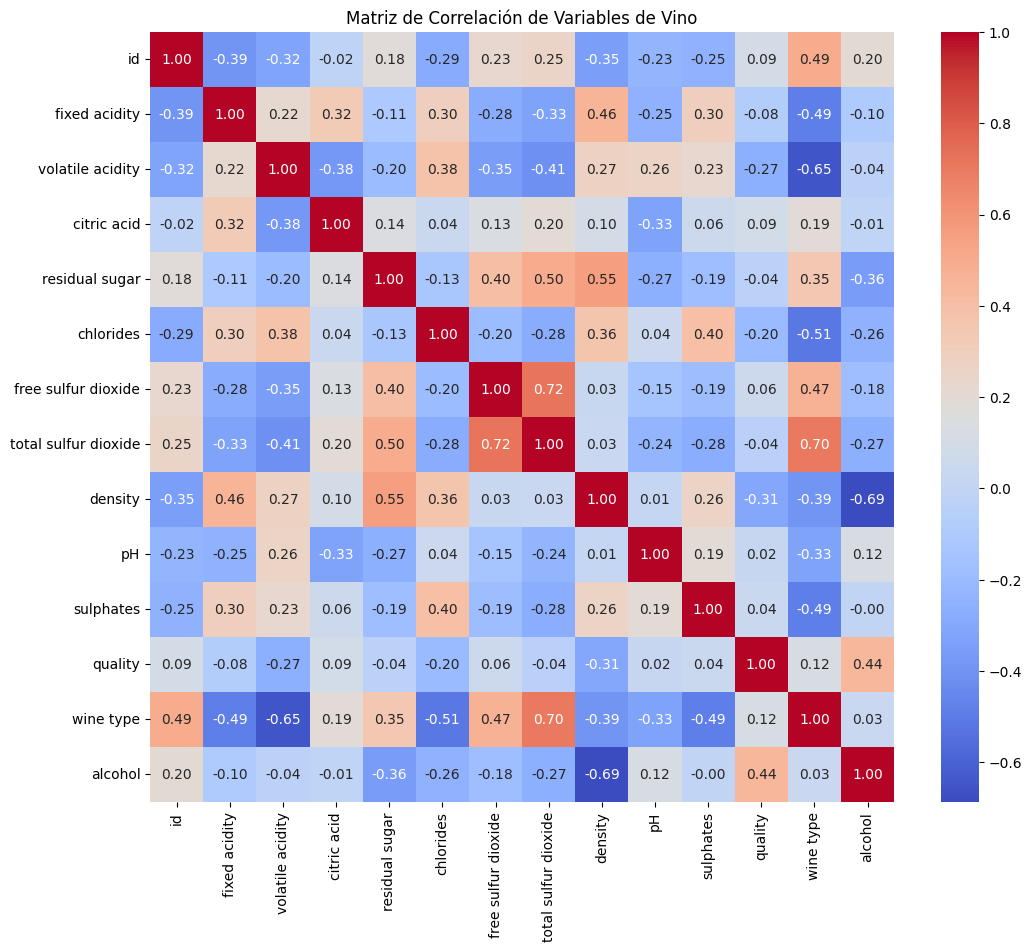

In [34]:
# Calculamos la matriz de correlación
correlation_matrix = df.corr()

# Visualizamos la matriz de correlación con un heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación de Variables de Vino')
plt.show()

Dada esta Matriz de Correlacion podemos sacar algunas conclusiones:
* Se tiene una correlación positiva fuerte (0.44) entre el alcohol y la calidad del vino. Podemos suponer que es poque los vinos con mayor contenido alcohólico tienden a ser de mayor calidad.
* La acidez volátil tiene una correlación negativa fuerte (-0.65) con el tipo de vino, indicando que los vinos blancos tienden a tener menor acidez volátil en comparación con los vinos tintos.
*  Existe una correlación muy alta (0.72) entre el dióxido de azufre libre y el total.
* Hay una correlación negativa fuerte (-0.69) entre la densidad y el alcohol, lo cual puede llegar a tener sentido dado que a medida que el contenido de alcohol aumenta, la densidad del vino tiende a disminuir.
* La acidez volátil muestra una correlación negativa considerable (-0.65) con la calidad del vino, esto indica que los vinos con menor acidez volátil suelen ser de mayor calidad.

# **Pregunta 2**

2) Ejecutar diferentes procesos de agrupamiento utilizando el algoritmo K-Means e identificar cual es el valor de k que mejor resultados ofrece (1 punto). En necesario justificar la selección del mejor valor de k mediante la utilización de datos empíricos.

Para determinar el valor óptimo de k, utilizaremos dos métodos:

* Elbow Method: Este método implica graficar los resultados de la suma de las distancias al cuadrado de las muestras al centro más cercano del clúster para diferentes valores de k y buscar un "codo" donde el descenso en la suma de las distancias se estabiliza.
* Silhouette Score: Este método evalúa la calidad de los clústeres calculando cómo de similar es un objeto a su propio clúster comparado con otros clústeres. El valor de k que maximiza el promedio del índice de silueta se considera óptimo.

In [35]:
# Seleccionamos las columnas relevantes para el agrupamiento
features = ['alcohol', 'volatile acidity', 'density']
df_cluster = df[features]

# Normalizamos las características
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

# Convertimos de nuevo a DataFrame para mejor manejo posterior
df_cluster_scaled = pd.DataFrame(df_cluster_scaled, columns=features)
df_cluster_scaled.head()

,alcohol,volatile acidity,density
0,-0.915464,2.188833,1.034993
1,-0.580068,3.282235,0.701486
2,-0.580068,2.553300,0.768188
3,-0.580068,-0.362438,1.101694
4,-0.915464,2.188833,1.034993


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

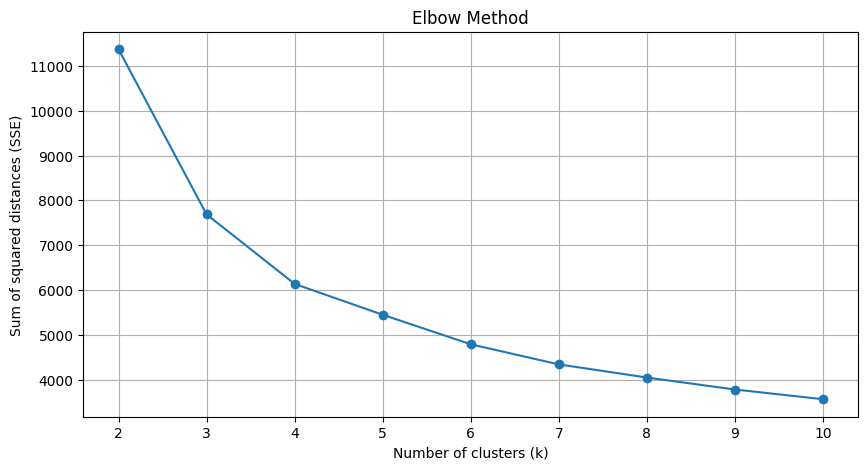

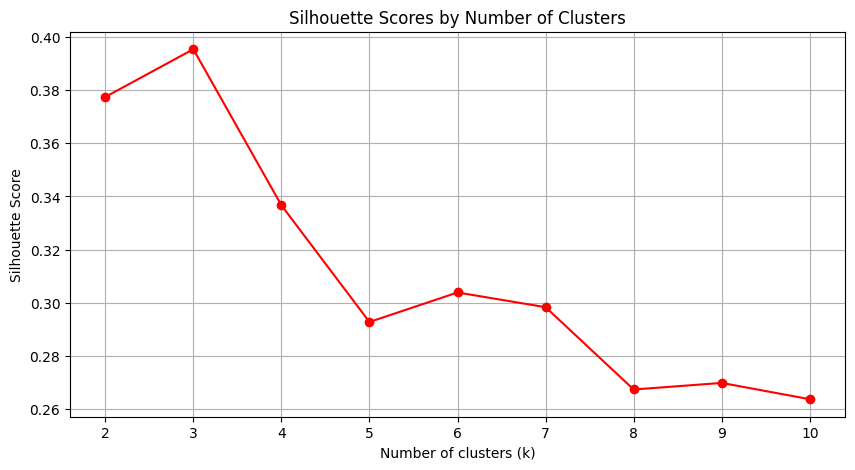

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Seleccionamos las variables relevantes para el agrupamiento
data_for_clustering = df[['alcohol', 'volatile acidity', 'density']]

# Estandarizamos los datos para mejorar los resultados del agrupamiento
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Definimos un rango de valores de k para probar
k_values = range(2, 11)  # Probaremos desde k=2 hasta k=10

# Listas para almacenar los resultados de cada métrica
sse = []  # Suma de los cuadrados de las distancias
silhouette_scores = []

# Aplicamos K-Means para cada valor de k y calcular las métricas
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)
    silhouette = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette)

# Graficamos el método del codo
plt.figure(figsize=(10, 5))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSE)')
plt.grid(True)
plt.show()

# Graficamos los scores de silueta
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o', color='red')
plt.title('Silhouette Scores by Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

Si nos fijamos en la grafica de Score de Silueta vemos que el valor mas alto se alcanza cuando k=3, con esto vemos que con 3 clusters los puntos estan mejor asignados a clusteres mas cohesivos y por ende separados de otros clusteres, con esto podemos ver la calidad del agrupamiento dando asi una alta integridad del cluster y una buena diferenciacion entre los clusteres.

En el gráfico que aplica el método del codo, observamos que existe un punto de inflexión claro en K=4. Esto indica que añadir más clústeres más allá de este número resulta en una disminución significativamente menor de la suma de las distancias al cuadrado (SSE).

En conclusión, optar por k=3 está claramente justificado por los datos empíricos de los scores de silueta, proporcionan un equilibrio óptimo entre la cohesión interna de los clústeres y su clara separación

# **Pregunta 3**

Analiza los clústeres obtenidos para el mejor valor de k y responde a las siguientes preguntas:

* ¿Existe algún tipo de similitud entre los grupos obtenidos y los valores de la variable quality del dataset? (0.5 puntos).
* ¿Cómo se diferencian los clústeres entre sí? (0.5 puntos). En necesario justificar las respuestas mediante la utilización de datos empíricos.

In [37]:
# Configuración para correr K-Means con k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_scaled)

# Asignar las etiquetas de clúster al DataFrame original para análisis
df['cluster'] = kmeans.labels_

# Calcular las estadísticas descriptivas para cada clúster y para la variable quality
cluster_description = df.groupby('cluster').agg({
    'alcohol': ['mean', 'std'],
    'volatile acidity': ['mean', 'std'],
    'density': ['mean', 'std'],
    'quality': ['mean', 'std', 'min', 'max']
})

cluster_description

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


alcohol           volatile acidity             density            \
              mean       std             mean       std      mean       std   
cluster                                                                       
0         9.659077  0.601534         0.272812  0.077948  0.996235  0.002092   
1        11.690989  0.837019         0.283422  0.097349  0.991755  0.001686   
2        10.125071  0.864427         0.619398  0.138681  0.996847  0.002206   

          quality                    
             mean       std min max  
cluster                              
0        5.634188  0.752693   3   9  
1        6.262542  0.875601   3   9  
2        5.374576  0.748443   3   8

En el Clúster 0 podemos ver que hay un menor contenido de alcohol (9.66%), una baja acidez volátil (0.27%), y una densidad más alta (0.996).En cuanto al promedio de calidad es de 5.63 con una variabilidad de 0.75.

Con el Clúster 1 vemos mayor contenido de alcohol (11.69%), una acidez volátil moderada (0.28%), y la densidad más baja (0.992). El promedio de calidad es de 6.26, que es el más alto entre los clústeres, con una variabilidad de 0.88.

Clúster 2, tiene el contenido de alcohol moderado (10.12%), una alta acidez volátil (0.62%), y una densidad moderada (0.997).El promedio de calidad más bajo es de 5.37, siendo el mas bajo entre los clusters, con una variabilidad de 0.75.

**¿Existe algún tipo de similitud entre los grupos obtenidos y los valores de la variable quality del dataset?**

Despues de haber descrito los clústeres podemos ver que reflejan diferencias significativas en la calidad promedio de los vinos, en el Clúster 1, vemos que tiene el mayor contenido de alcohol y la menor densidad entre los demas clusteres pero a su vez muestra la calidad promedio más alta. Podriamos suponer que el contenido del alcohol podría estar positivamente correlacionado con la percepción de calidad, coincidiendo con la correlación observada anteriormente entre el alcohol y la calidad. En cambio, el Clúster 2, tiene la acidez volátil más alta y muestra la calidad más baja, lo cual fundamenta la correlación negativa previamente identificada entre la acidez volátil y la calidad.

**¿Cómo se diferencian los clústeres entre sí?**

La diferenciacion entre los clusteres se puede observar en:
* Contenido de Alcohol: El Cluster 1 es el que obtiene mayor contenido de alcohol seguido del Cluster 2 y luego el Cluster 0

* Acidez Volátil: El Clúster 2 tiene la mayor acidez volátil, lo que puede contribuir a su menor calidad promedio.

* Densidad: El Clúster 1 presenta la densidad más baja, lo cual podría correlacionarse con un perfil de calidad superior.

# **Ejercicio 4**

La empresa productora de vinos desea mejorar el proceso de producción de sus vinos con el objetivo de
mejorar las futuras producciones.
Para ello han pensado en utilizar un algoritmo de agrupamiento jerárquico para segmentar los diferentes vinos
en base a sus componentes, calidad y nivel de alcohol.


1) Dado el mejor valor de k del apartado anterior selecciona los 10 ejemplos más representativos de cada clúster para generar un nuevo dataset y aplicar agrupamiento jerárquico y responder a las siguientes
preguntas:
• ¿Cuál ha sido tu criterio para seleccionar los ejemplos más representativos de cada clúster?

2) Seleccionar un algoritmo de agrupamiento jerárquico y generar los diferentes clústeres en base a los
atributos seleccionados

3) Generar y analizar el dendrograma resultante del proceso de agrupamiento.

# **Pregunta 1**

Cargamos la base de datos y hacemos los ajustes necesarios para visualizarla.

In [38]:
import pandas as pd


data_path = 'wine_alcohol.csv'
wine_data = pd.read_csv(data_path)


wine_data.info(), wine_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 1 columns):
 #   Column                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                          --------------  ----- 
 0   id;fixed acidity;volatile acidity;citric acid;residual sugar;chlorides;free sulfur dioxide;total sulfur dioxide;density;pH;sulphates;quality;wine type;alcohol  6497 non-null   object
dtypes: object(1)
memory usage: 50.9+ KB


(None,
   id;fixed acidity;volatile acidity;citric acid;residual sugar;chlorides;free sulfur dioxide;total sulfur dioxide;density;pH;sulphates;quality;wine type;alcohol
 0  0;7.4;0.7;0.0;1.9;0.076;11.0;34.0;0.9978;3.51;...                                                                                                            
 1  1;7.8;0.88;0.0;2.6;0.098;25.0;67.0;0.9968;3.2;...                                                                                                            
 2  2;7.8;0.76;0.04;2.3;0.092;15.0;54.0;0.997;3.26...                                                                                                            
 3  3;11.2;0.28;0.56;1.9;0.075;17.0;60.0;0.998;3.1...                                                                                                            
 4  4;7.4;0.7;0.0;1.9;0.076;11.0;34.0;0.9978;3.51;...                                                                                                            )

In [39]:
# Separamos en columnas para visualizar los datos
wine_data = wine_data['id;fixed acidity;volatile acidity;citric acid;residual sugar;chlorides;free sulfur dioxide;total sulfur dioxide;density;pH;sulphates;quality;wine type;alcohol'].str.split(';', expand=True)


wine_data.columns = ['id', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                     'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                     'pH', 'sulphates', 'quality', 'wine type', 'alcohol']

# Convertimos las columnas en los apropiados tipos de datos
wine_data = wine_data.apply(pd.to_numeric, errors='ignore')


wine_data.info(), wine_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine type             6497 non-null   int64  
 13  alcohol               6497 non-null   float64
dtypes: float64(11), int64(3)
memory usage: 710.7 KB


(None,
    id  fixed acidity  volatile acidity  citric acid  residual sugar  \
 0   0            7.4              0.70         0.00             1.9   
 1   1            7.8              0.88         0.00             2.6   
 2   2            7.8              0.76         0.04             2.3   
 3   3           11.2              0.28         0.56             1.9   
 4   4            7.4              0.70         0.00             1.9   
 
    chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
 0      0.076                 11.0                  34.0   0.9978  3.51   
 1      0.098                 25.0                  67.0   0.9968  3.20   
 2      0.092                 15.0                  54.0   0.9970  3.26   
 3      0.075                 17.0                  60.0   0.9980  3.16   
 4      0.076                 11.0                  34.0   0.9978  3.51   
 
    sulphates  quality  wine type  alcohol  
 0       0.56        5          1      9.4  
 1       0.68    

Realizamos un agrupamiento K-Means rápido con k=3 (obtenido del ejercicio anterior) y luego seleccionamos los 10 ejemplos más cercanos al centroide de cada clúster. Elegimos la distancia euclidiana como método para seleccionar los 10 ejemplos más cercanos al centroide.

Después, aplicamos el agrupamiento jerárquico a este nuevo conjunto reducido de datos.

In [40]:
from sklearn.cluster import KMeans
from scipy.spatial import distance

# Suponiendo que el mejor número de k=3 (determinado en el ejercicio 3)
k = 3
features = wine_data.drop(['id', 'wine type'], axis=1)  # Seleccionamos solo las características relevantes

# Realizando K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
wine_data['cluster'] = kmeans.fit_predict(features)

# Seleccionar los 10 ejemplos más cercanos al centroide de cada clúster
representative_samples = pd.DataFrame()
for c in range(k):
    cluster_data = wine_data[wine_data['cluster'] == c]
    centroids = kmeans.cluster_centers_[c]
    # Calcular la distancia euclidiana de cada punto en el clúster al centroide
    distances = cluster_data.apply(lambda x: distance.euclidean(x[features.columns], centroids), axis=1)
    # Obtener los 10 ejemplos más cercanos al centroide
    closest_data = cluster_data.loc[distances.nsmallest(10).index]
    representative_samples = pd.concat([representative_samples, closest_data])

representative_samples.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol,cluster
3780,2181,7.4,0.29,0.25,3.8,0.044,30.0,114.0,0.99200,3.11,0.40,6,2,11.000000,0
4768,3169,5.7,0.16,0.26,6.3,0.043,28.0,113.0,0.99360,3.06,0.58,6,2,9.900000,0
2397,798,5.4,0.18,0.24,4.8,0.041,30.0,113.0,0.99445,3.42,0.40,6,2,9.400000,0
6266,4667,6.1,0.16,0.34,6.1,0.034,31.0,114.0,0.99365,3.32,0.58,7,2,10.150000,0
6263,4664,6.1,0.16,0.34,6.1,0.034,31.0,114.0,0.99365,3.32,0.58,7,2,10.133333,0


Ahora procedemos con el segundo paso, que es aplicar el agrupamiento jerárquico a este conjunto de datos reducido y generar un dendrograma para visualizar los clústeres resultantes.

Para esto, vamos a utilizar el método de enlace de Ward, ya que crea clústeres más balanceados minimizando la varianza dentro de cada clúster. Empezaremos realizando el agrupamiento y luego generamos el dendograma:

In [41]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Preparamos los datos para el agrupamiento jerárquico
# Eliminamos las columnas no numéricas y la columna 'cluster' porque no es una característica
hierarchical_data = representative_samples.drop(['id', 'wine type', 'cluster'], axis=1)

# Aplicamos el agrupamiento jerárquico usando el método de Ward
linked = linkage(hierarchical_data, method='ward')

Ahora dibujamos los clústeres.

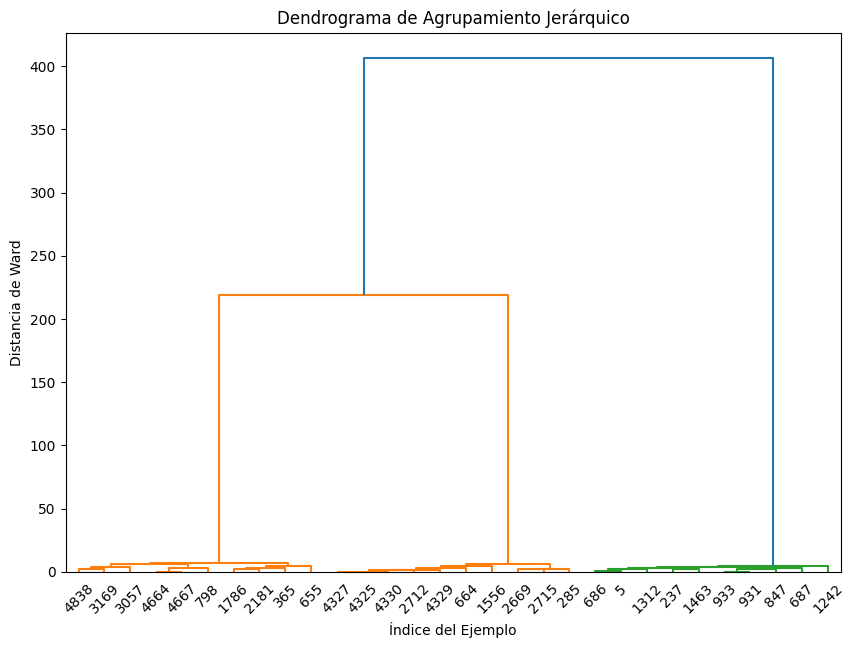

In [42]:
# Dibujamos el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=representative_samples['id'].astype(str).values,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma de Agrupamiento Jerárquico')
plt.xlabel('Índice del Ejemplo')
plt.ylabel('Distancia de Ward')
plt.show()